## Project Title: Optimal Bidding Strategy for Virtual Power Plants (VPPs) using Machine Learning Intelligent Models

#### Aim:
- The aim of this project is to enhance the profitability and efficiency of Virtual Power Plants (VPPs) using ML smart models.

## Outline 

1. Data Ingestion 
    * Generation of VPP synthetic data and conversion to csv
    * Reading the dataset into the pandas workflow
2. Exploratory Data Analysis
    * Checking for missing values and other irregularities
    * Encoding categorical variables
    * Visualizations for insights
3. Data Engineering
    * Feature selection and extraction
    * Scaling numerical features
    * incorporation of domain knowledge to improve feature representation
4. Data Split
    * Splitting the dataset into training and testing sets for model performance evaluation
5. Model Selection
    * Random Forest Regressor and Gradient Boosting Algorithms
    * Interpreting the models to capture the non-linear relationships
6. Model Training
    * Trianing the selected model on the training dataset using the input features and the target variable
    * Tuning the hyperparameters to optimize models performance using the GridSearchCV 
7. Model Evaluation 
    * Evaluating the model on the testing dataset to assess its generation 
    * Use of metrics such as Mean Square Error (MSE), Mean Absolute Error (MAE), etc
8. Iterative Refinement
    * if the model does not perform well, redefinition of the features and model iterations and repeatition of the model training.
9. Documentation and reporting
    * Documentation of the results
    * Reporting of the significance with respect to the bidding of price in VPP
    * Laws and Market obligations
10. conclusion

## 1. Data Ingestion 

* Generation of VPP synthetic data with python and conversion to csv file

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data for the sample dataset
timestamps = pd.date_range(start="2023-01-01 00:00:00", periods=1000, freq="H")
demand = np.random.randint(80, 120, size=1000)
solar_generation = np.random.randint(0, 15, size=1000)
wind_generation = np.random.randint(0, 30, size=1000)
market_price = np.random.uniform(20, 40, size=1000)
competitor_bids = np.random.uniform(25, 35, size=1000)
operational_constraints = np.random.choice(["Yes", "No"], size=1000, p=[0.2, 0.8])
temperature = np.random.uniform(20, 30, size=1000)
regulatory_constraints = np.random.choice(["Yes", "No"], size=1000, p=[0.3, 0.7])
day_of_week = np.random.choice(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], size=1000)
hour_of_day = np.random.randint(0, 24, size=1000)
season = np.random.choice(["Winter", "Spring", "Summer", "Fall"], size=1000)

# Assuming a simple linear relationship for the optimal bid price based on the features
optimal_bid_price = 5 + 2*demand + 1.5*solar_generation - 0.8*wind_generation + 1.2*market_price - 1.0*competitor_bids - 0.5*temperature - 1.0*(regulatory_constraints == "Yes") + 0.5*(operational_constraints == "Yes") + 0.3*(day_of_week == "Saturday" ) + 0.3*(day_of_week == "Sunday") + 0.5*(season == "Summer")

# Create the DataFrame
data = {
    'Timestamp': timestamps,
    'Demand (MW)': demand,
    'Solar Generation (MW)': solar_generation,
    'Wind Generation (MW)': wind_generation,
    'Market Price (\$/MWh)': market_price,
    'Competitor Bids (\$/MWh)': competitor_bids,
    'Operational Constraints': operational_constraints,
    'Temperature (Celsius)': temperature,
    'Regulatory Constraints': regulatory_constraints,
    'Day of Week': day_of_week,
    'Hour of Day': hour_of_day,
    'Season': season,
    'Optimal Bid Price (\$/MWh)': optimal_bid_price
}

df = pd.DataFrame(data)

# Display the first few rows of the dataset
print(df.head())

            Timestamp  Demand (MW)  Solar Generation (MW)  \
0 2023-01-01 00:00:00          118                     13   
1 2023-01-01 01:00:00          108                      7   
2 2023-01-01 02:00:00           94                      8   
3 2023-01-01 03:00:00           87                      5   
4 2023-01-01 04:00:00          100                     10   

   Wind Generation (MW)  Market Price (\$/MWh)  Competitor Bids (\$/MWh)  \
0                    26              39.693395                 29.366142   
1                     2              38.747761                 30.800888   
2                    27              20.863475                 30.166984   
3                     9              23.296296                 32.587763   
4                    18              22.634575                 27.824961   

  Operational Constraints  Temperature (Celsius) Regulatory Constraints  \
0                     Yes              23.137031                     No   
1                      No 

* Conversion to .csv files for ease of working with it on pandas

In [2]:
df.to_csv('virtual_power_plant_data.csv', index=False)

* Reading the dataset into pandas DataFrame

In [3]:
vpp_data = pd.read_csv('virtual_power_plant_data.csv')

vpp_data.head()

,Timestamp,Demand (MW),Solar Generation (MW),Wind Generation (MW),Market Price (\$/MWh),Competitor Bids (\$/MWh),Operational Constraints,Temperature (Celsius),Regulatory Constraints,Day of Week,Hour of Day,Season,Optimal Bid Price (\$/MWh)
0,2023-01-01 00:00:00,118,13,26,39.693395,29.366142,Yes,23.137031,No,Monday,11,Spring,246.897416
1,2023-01-01 01:00:00,108,7,2,38.747761,30.800888,No,26.356453,No,Thursday,0,Summer,232.918199
2,2023-01-01 02:00:00,94,8,27,20.863475,30.166984,No,23.559578,No,Sunday,2,Winter,166.789397
3,2023-01-01 03:00:00,87,5,9,23.296296,32.587763,No,21.485068,Yes,Sunday,2,Spring,163.225259
4,2023-01-01 04:00:00,100,10,18,22.634575,27.824961,No,25.964671,No,Friday,4,Fall,191.954195


## 2. Exploratory Data Analysis

* Data Overview

In [4]:
vpp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Timestamp                   1000 non-null   object 
 1   Demand (MW)                 1000 non-null   int64  
 2   Solar Generation (MW)       1000 non-null   int64  
 3   Wind Generation (MW)        1000 non-null   int64  
 4   Market Price (\$/MWh)       1000 non-null   float64
 5   Competitor Bids (\$/MWh)    1000 non-null   float64
 6   Operational Constraints     1000 non-null   object 
 7   Temperature (Celsius)       1000 non-null   float64
 8   Regulatory Constraints      1000 non-null   object 
 9   Day of Week                 1000 non-null   object 
 10  Hour of Day                 1000 non-null   int64  
 11  Season                      1000 non-null   object 
 12  Optimal Bid Price (\$/MWh)  1000 non-null   float64
dtypes: float64(4), int64(4), object(5)

There are 13 columns in the dataset with about 1000 observations. There are three different data types; 
* Object dataset
* Integers
* Floats

In [5]:
# Checking the statistical parameters

vpp_data.describe()

,Demand (MW),Solar Generation (MW),Wind Generation (MW),Market Price (\$/MWh),Competitor Bids (\$/MWh),Temperature (Celsius),Hour of Day,Optimal Bid Price (\$/MWh)
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,99.991000,6.984000,14.203000,29.949839,29.975579,24.971848,11.313000,197.590904
std,11.780055,4.339652,8.703076,5.795805,2.854284,2.886137,7.107711,26.977480
min,80.000000,0.000000,0.000000,20.002694,25.000116,20.009434,0.000000,131.815900
25%,90.000000,3.000000,7.000000,25.182556,27.503402,22.522853,5.000000,176.969316
50%,101.000000,7.000000,14.000000,29.945079,29.988263,24.845955,11.000000,198.616892
75%,110.250000,11.000000,22.000000,35.024546,32.419855,27.415814,17.250000,217.789863
max,119.000000,14.000000,29.000000,39.966950,34.995577,29.993503,23.000000,266.501937


The statistical parameters shows that the dataset almost will not have an outlier. 

* Checking for missing values 

In [6]:
vpp_data.isna().sum()

Timestamp                     0
Demand (MW)                   0
Solar Generation (MW)         0
Wind Generation (MW)          0
Market Price (\$/MWh)         0
Competitor Bids (\$/MWh)      0
Operational Constraints       0
Temperature (Celsius)         0
Regulatory Constraints        0
Day of Week                   0
Hour of Day                   0
Season                        0
Optimal Bid Price (\$/MWh)    0
dtype: int64

###### There is no missing values

* Let's visualize to examine how the demand and the energy (solar and wind) generation match up the market price over time

In [7]:
# Using 500 observations as sample for the visualizations

df = vpp_data[:500]

df

,Timestamp,Demand (MW),Solar Generation (MW),Wind Generation (MW),Market Price (\$/MWh),Competitor Bids (\$/MWh),Operational Constraints,Temperature (Celsius),Regulatory Constraints,Day of Week,Hour of Day,Season,Optimal Bid Price (\$/MWh)
0,2023-01-01 00:00:00,118,13,26,39.693395,29.366142,Yes,23.137031,No,Monday,11,Spring,246.897416
1,2023-01-01 01:00:00,108,7,2,38.747761,30.800888,No,26.356453,No,Thursday,0,Summer,232.918199
2,2023-01-01 02:00:00,94,8,27,20.863475,30.166984,No,23.559578,No,Sunday,2,Winter,166.789397
3,2023-01-01 03:00:00,87,5,9,23.296296,32.587763,No,21.485068,Yes,Sunday,2,Spring,163.225259
4,2023-01-01 04:00:00,100,10,18,22.634575,27.824961,No,25.964671,No,Friday,4,Fall,191.954195
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2023-01-21 15:00:00,91,13,13,22.842742,31.595108,Yes,24.983330,No,Sunday,7,Fall,180.224518
496,2023-01-21 16:00:00,88,0,18,20.234132,32.962415,Yes,26.032454,Yes,Saturday,12,Winter,144.702317
497,2023-01-21 17:00:00,86,2,3,28.440685,27.719460,No,22.272611,No,Saturday,22,Fall,173.173057
498,2023-01-21 18:00:00,107,12,25,25.900814,31.923589,No,25.437871,Yes,Friday,10,Fall,202.438452


In [8]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

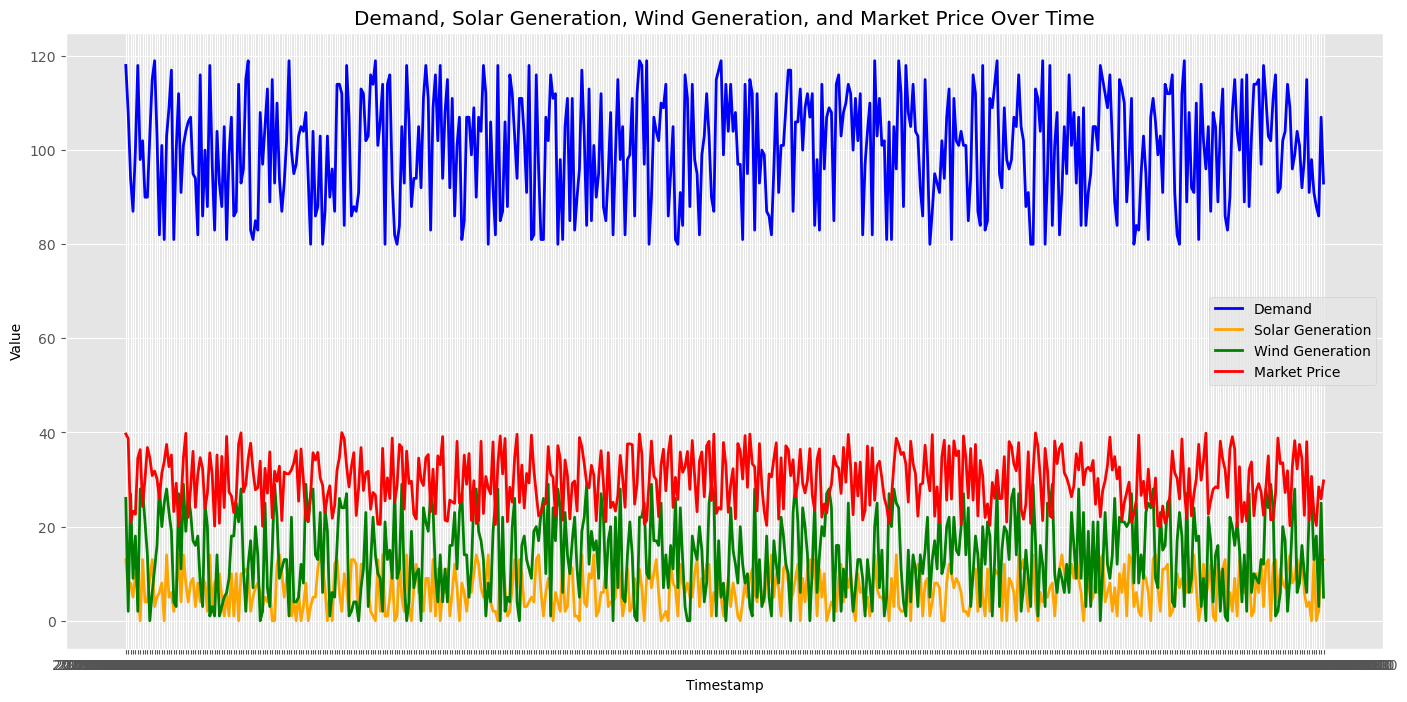

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting
plt.figure(figsize=(17, 8))

plt.plot(df['Timestamp'], df['Demand (MW)'], label='Demand', linewidth=2, color='blue')
plt.plot(df['Timestamp'], df['Solar Generation (MW)'], label='Solar Generation', linewidth=2, color='orange')
plt.plot(df['Timestamp'], df['Wind Generation (MW)'], label='Wind Generation', linewidth=2, color='green')
plt.plot(df['Timestamp'], df['Market Price (\$/MWh)'], label='Market Price', linewidth=2, color='red')

# Adding labels and title
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.title('Demand, Solar Generation, Wind Generation, and Market Price Over Time')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

By visualizing these parameters together, the plot allows stakeholders to identify correlations, trends, and potential insights:

* Correlation between Generation and Demand: Examining the blue, orange, and green lines can reveal how well renewable sources (solar and wind) align with the electricity demand. This insight is crucial for optimizing the use of renewable energy sources.

* Market Price Dynamics: Observing how the market price fluctuates in relation to demand and generation patterns helps in identifying opportunities for cost-effective bidding. For instance, bidding during periods of high renewable generation may lead to more competitive pricing.

* Time-Based Patterns: The plot helps identify recurring patterns based on time of day, day of the week, or season. This information is valuable for optimizing operations and bidding strategies during specific time periods.


In summary, the plot provides a comprehensive overview of key parameters, enabling stakeholders to make informed decisions regarding bidding strategies, resource allocation, and operational planning within the virtual power plant.

* Let's make some hourly plots 

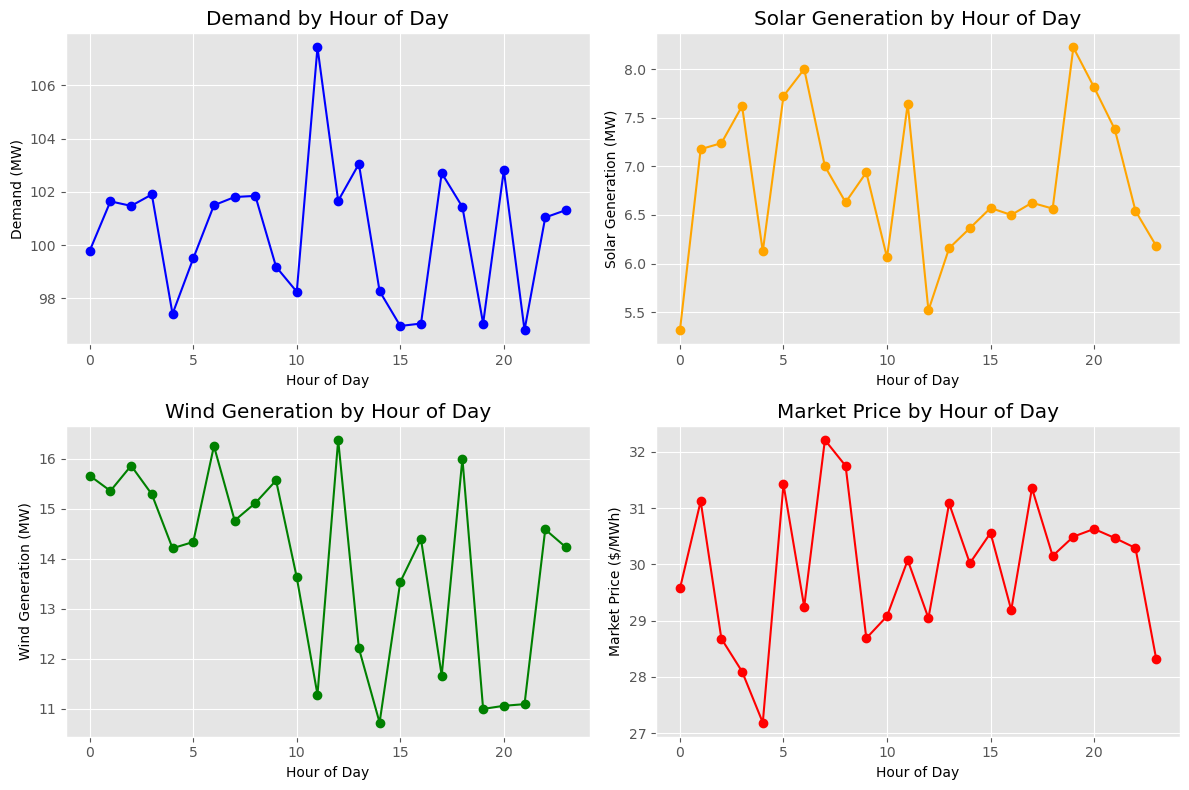

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your data is in a DataFrame named 'df'
# If not, you need to load your data into a DataFrame first

# Example:
# df = pd.read_csv('your_data.csv')

# Create a new DataFrame with relevant columns
hourly_data = df[['Hour of Day', 'Demand (MW)', 'Solar Generation (MW)', 'Wind Generation (MW)', 'Market Price (\$/MWh)']]

# Group data by the hour of the day and calculate the mean for each hour
hourly_avg = hourly_data.groupby('Hour of Day').mean()

# Plotting
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Plot Demand
axes[0, 0].plot(hourly_avg.index, hourly_avg['Demand (MW)'], marker='o', color='blue')
axes[0, 0].set_title('Demand by Hour of Day')
axes[0, 0].set_xlabel('Hour of Day')
axes[0, 0].set_ylabel('Demand (MW)')

# Plot Solar Generation
axes[0, 1].plot(hourly_avg.index, hourly_avg['Solar Generation (MW)'], marker='o', color='orange')
axes[0, 1].set_title('Solar Generation by Hour of Day')
axes[0, 1].set_xlabel('Hour of Day')
axes[0, 1].set_ylabel('Solar Generation (MW)')

# Plot Wind Generation
axes[1, 0].plot(hourly_avg.index, hourly_avg['Wind Generation (MW)'], marker='o', color='green')
axes[1, 0].set_title('Wind Generation by Hour of Day')
axes[1, 0].set_xlabel('Hour of Day')
axes[1, 0].set_ylabel('Wind Generation (MW)')

# Plot Market Price
axes[1, 1].plot(hourly_avg.index, hourly_avg['Market Price (\$/MWh)'], marker='o', color='red')
axes[1, 1].set_title('Market Price by Hour of Day')
axes[1, 1].set_xlabel('Hour of Day')
axes[1, 1].set_ylabel('Market Price (\$/MWh)')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

#### Insight 

1. Demand Patterns:
* Identify peak demand hours: Between the 10hr to the 12 hours of the day, is when the demand for energy is usually high. This indicates the hour when energyy is needed.

2. Renewable Energy Generation Patterns:
* Solar Generation: The generation of solar energy isn't consistent as it fluctuates through out the hours of the day. But reduces drasticallyduring the 12 to 15 hours of the day, which could be as a result of the high demand and usage of energy.
* Wind Generation: Wind energy is at it's peak from the 0th hour of the day and falls drastically during the 11th and 14th hour of the day.

3. Balance of Supply and Demand:
 * Compare Demand with Renewable Generation: The wind generation can aid to meet the demand for energy especially during the 12th hours of the day

4. Market Price Dynamics:
* Correlation with Generation: The price reduces during the periods of high generation of wind and solar, when there is a slide reduction in the generation of the energy, the market price rises

5. Time-of-Day Price Variations:
* Identify Price Peaks: From the 4th hour of the day the price of the energy produced or generated is usually high.

6. Operational and Regulatory Constraints:
* Peaks or drops in generation or price may be associated with specific constraints during certain hours.

7. Seasonal Differences:
* Daylight hours and energy demand may vary between summer and winter, affecting both renewable generation and market prices.


* Seasonal Analysis

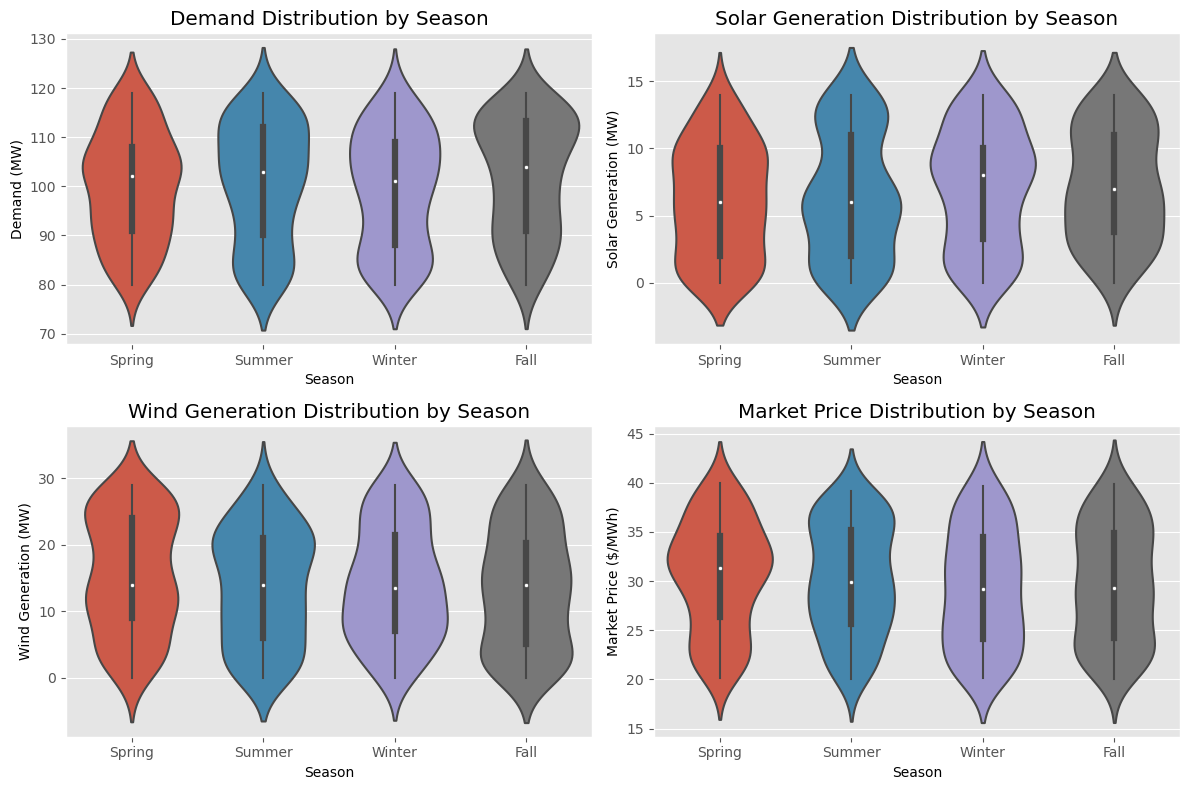

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your data is in a DataFrame named 'df'
# If not, you need to load your data into a DataFrame first

# Example:
# df = pd.read_csv('your_data.csv')

# Create a new DataFrame with relevant columns
seasonal_data = df[['Season', 'Demand (MW)', 'Solar Generation (MW)', 'Wind Generation (MW)', 'Market Price (\$/MWh)']]

# Plotting
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Plot Demand
sns.violinplot(x='Season', y='Demand (MW)', data=seasonal_data, ax=axes[0, 0])
axes[0, 0].set_title('Demand Distribution by Season')

# Plot Solar Generation
sns.violinplot(x='Season', y='Solar Generation (MW)', data=seasonal_data, ax=axes[0, 1])
axes[0, 1].set_title('Solar Generation Distribution by Season')

# Plot Wind Generation
sns.violinplot(x='Season', y='Wind Generation (MW)', data=seasonal_data, ax=axes[1, 0])
axes[1, 0].set_title('Wind Generation Distribution by Season')

# Plot Market Price
sns.violinplot(x='Season', y='Market Price (\$/MWh)', data=seasonal_data, ax=axes[1, 1])
axes[1, 1].set_title('Market Price Distribution by Season')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

* Insights 

1. Demand Distribution by Season:
    * Central Tendency: There was an average increase of the demand level in the fall season
    * Seasonal Variation: The Spring and the winter season experince the same level of demand for energy while the summer season was way close to the hihgest energy demand season

2. Solar Generation Distribution by Season:
    * Solar Peak Production: Solar peak production occur during the winter season, which can be stored in batteries and other storage systems for the season of great demand (the fall season)
    
3. Wind Generation Distribution by Season:
    * Wind Variability: There is an average production rate of energy across the seasoons which accounts for the seasonal changes in the solar generation in other seasons.
    
4. Market Price Distribution by Season:
    * Price Dynamics: The market price for the distribution is higher during the spring season which can be curtailed by storing the energy generated from solar.
    
5. Seasonal Constraints: There exist operational or regulatory constraints that might affect energy production or pricing during specific seasons.


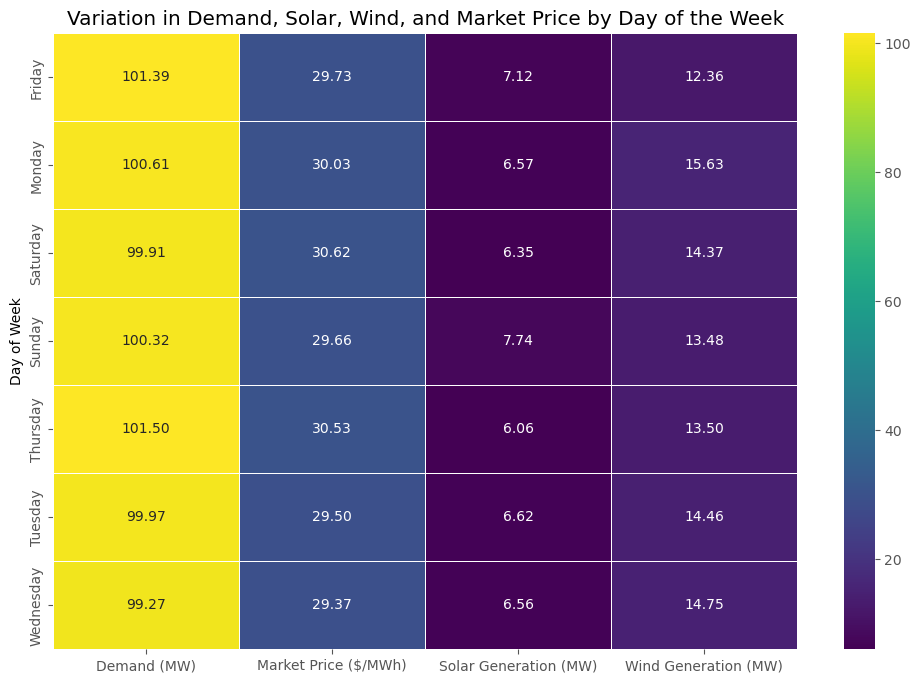

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a new DataFrame with relevant columns
day_of_week_data = df[['Day of Week', 'Demand (MW)', 'Solar Generation (MW)', 'Wind Generation (MW)', 'Market Price (\$/MWh)']]

# Pivot the data to create a matrix suitable for a heatmap
heatmap_data = day_of_week_data.pivot_table(index='Day of Week', values=['Demand (MW)', 'Solar Generation (MW)', 'Wind Generation (MW)', 'Market Price (\$/MWh)'], aggfunc='mean')

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt=".2f", linewidths=.5)
plt.title('Variation in Demand, Solar, Wind, and Market Price by Day of the Week')
plt.show()


#### Insights

1. Demand Patterns:
* Peak Days: High demand of energy occurs on Thursady, due to the demand from offices and professional instutions.

2. Renewable Energy Generation Patterns:
* Solar and Wind Peaks: Explore which days show higher average solar and wind generation. Understanding the variability in renewable energy production across days helps in managing the grid efficiently.

3. Market Price Dynamics:
* Price Spikes: Saturday, Thursday and Monday gives an averagely high market price which complement the fact that the demand is also high during those periods.

4. Day-of-Week Trends:
* Consistent Patterns: The demand for energy increase as the week starts (Monday) and reduces gradually to mid-week (wednesday) and increases from Thursay as the weekend approaches

5. Operational Considerations:
* Resource Planning: The heatmap can guide resource planning by highlighting days that require increased attention due to higher demand or price volatility.

6. Weekday vs. Weekend Differences:
* Weekend Effect: There is cummulative high demand and hike in market price for the energy consumption during the weekend compared to the week-day

7. Bidding Strategies: The day-ahead bidding strategy will be very effective here, since we can easily estimate the day of the week that has the higher demand for energy and hike in the price for energy consumption.

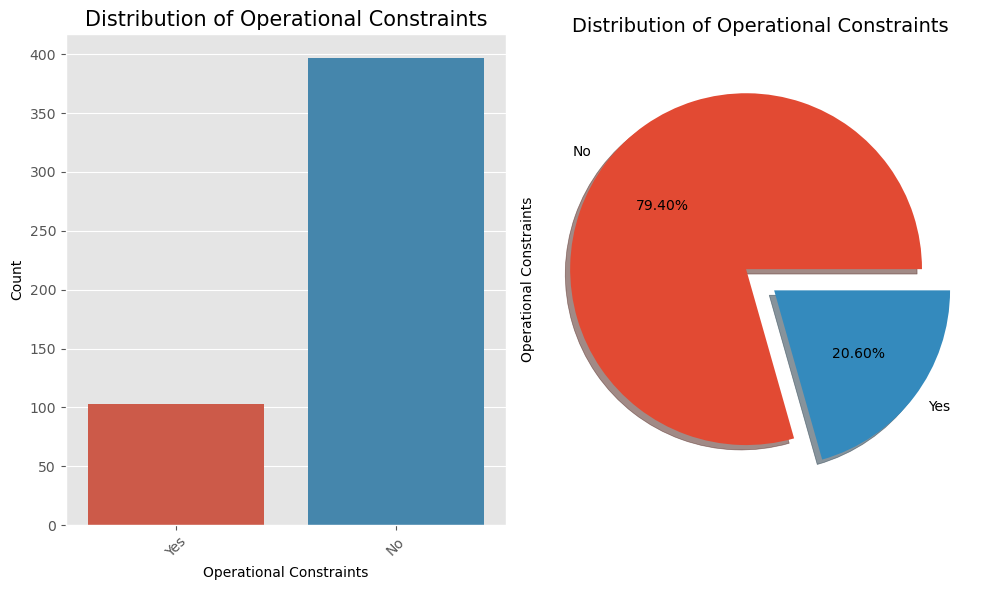

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame containing 'Operational Constraints' column

# Extract operational and regulatory constraints columns
operational_constraints = df['Operational Constraints'].value_counts()
regulatory_constraints = df['Regulatory Constraints'].value_counts()

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

# Plotting the bar plot for operational constraints
sns.countplot(x='Operational Constraints', data=df, ax=axes[0])
axes[0].set_title('Distribution of Operational Constraints', fontsize=15)
axes[0].set_xlabel('Operational Constraints')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

# Plotting the Pie-chart for operational constraints
df['Operational Constraints'].value_counts().plot.pie(explode=[0.1, 0.1], autopct='%1.2f%%', shadow=True, ax=axes[1])
axes[1].set_title("Distribution of Operational Constraints", fontsize=14, pad=20)

plt.tight_layout()  # Adjusts subplots to avoid overlap
plt.show()

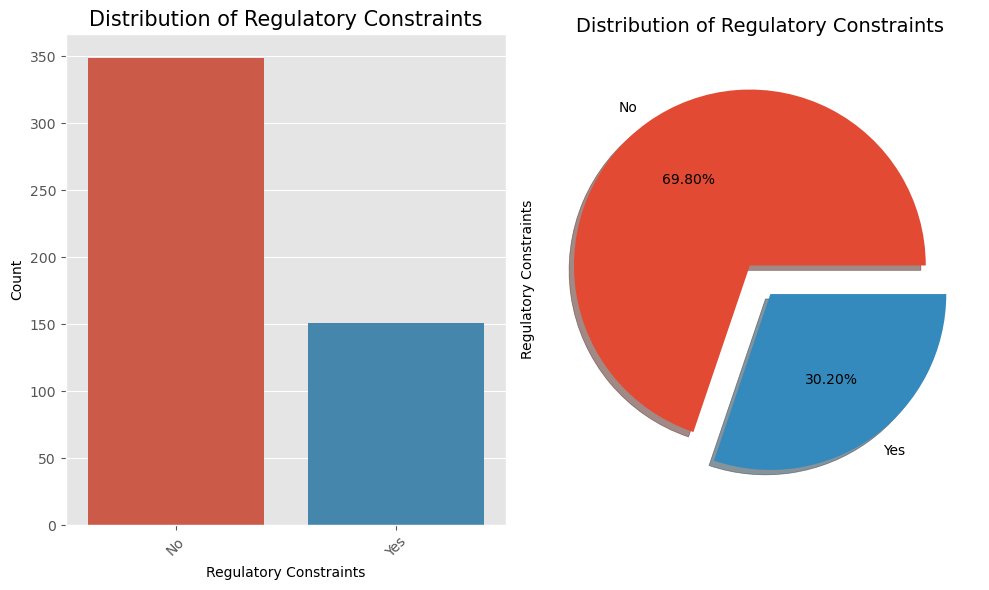

In [14]:
# Extract operational and regulatory constraints columns
operational_constraints = df['Operational Constraints'].value_counts()
regulatory_constraints = df['Regulatory Constraints'].value_counts()

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

# Plotting the bar plot for Regulatory Constraints
sns.countplot(x='Regulatory Constraints', data=df, ax=axes[0])
axes[0].set_title('Distribution of Regulatory Constraints', fontsize=15)
axes[0].set_xlabel('Regulatory Constraints')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

# Plotting the Pie-chart for operational constraints
df['Regulatory Constraints'].value_counts().plot.pie(explode=[0.1, 0.1], autopct='%1.2f%%', shadow=True, ax=axes[1])
axes[1].set_title("Distribution of Regulatory Constraints", fontsize=14, pad=20)

plt.tight_layout()  # Adjusts subplots to avoid overlap
plt.show()

#### Insights 

1. Regulatory Constraints influences 30.20% of the datasets
2. Operation constraints has about 20.60% influence on the energy demand and pricing

## 3. Data Engineering 

* Encoding of the categorical vairables
* Feature selection and extraction
* Scaling numerical features

* Encoding of the categorical vairables 

In [15]:
vpp_data.head()

,Timestamp,Demand (MW),Solar Generation (MW),Wind Generation (MW),Market Price (\$/MWh),Competitor Bids (\$/MWh),Operational Constraints,Temperature (Celsius),Regulatory Constraints,Day of Week,Hour of Day,Season,Optimal Bid Price (\$/MWh)
0,2023-01-01 00:00:00,118,13,26,39.693395,29.366142,Yes,23.137031,No,Monday,11,Spring,246.897416
1,2023-01-01 01:00:00,108,7,2,38.747761,30.800888,No,26.356453,No,Thursday,0,Summer,232.918199
2,2023-01-01 02:00:00,94,8,27,20.863475,30.166984,No,23.559578,No,Sunday,2,Winter,166.789397
3,2023-01-01 03:00:00,87,5,9,23.296296,32.587763,No,21.485068,Yes,Sunday,2,Spring,163.225259
4,2023-01-01 04:00:00,100,10,18,22.634575,27.824961,No,25.964671,No,Friday,4,Fall,191.954195


In [16]:
from sklearn.preprocessing import LabelEncoder

vpp_df = vpp_data.copy()

# Assuming 'column_name' is the name of your categorical column
label_encoder = LabelEncoder()
vpp_df['Operational Constraints'] = label_encoder.fit_transform(vpp_df['Operational Constraints'])
vpp_df['Regulatory Constraints'] = label_encoder.fit_transform(vpp_df['Regulatory Constraints'])
vpp_df['Season'] = label_encoder.fit_transform(vpp_df['Season'])
vpp_df['Day of Week'] = label_encoder.fit_transform(vpp_df['Day of Week'])

vpp_df.head()

,Timestamp,Demand (MW),Solar Generation (MW),Wind Generation (MW),Market Price (\$/MWh),Competitor Bids (\$/MWh),Operational Constraints,Temperature (Celsius),Regulatory Constraints,Day of Week,Hour of Day,Season,Optimal Bid Price (\$/MWh)
0,2023-01-01 00:00:00,118,13,26,39.693395,29.366142,1,23.137031,0,1,11,1,246.897416
1,2023-01-01 01:00:00,108,7,2,38.747761,30.800888,0,26.356453,0,4,0,2,232.918199
2,2023-01-01 02:00:00,94,8,27,20.863475,30.166984,0,23.559578,0,3,2,3,166.789397
3,2023-01-01 03:00:00,87,5,9,23.296296,32.587763,0,21.485068,1,3,2,1,163.225259
4,2023-01-01 04:00:00,100,10,18,22.634575,27.824961,0,25.964671,0,0,4,0,191.954195


In [17]:
vpp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Timestamp                   1000 non-null   object 
 1   Demand (MW)                 1000 non-null   int64  
 2   Solar Generation (MW)       1000 non-null   int64  
 3   Wind Generation (MW)        1000 non-null   int64  
 4   Market Price (\$/MWh)       1000 non-null   float64
 5   Competitor Bids (\$/MWh)    1000 non-null   float64
 6   Operational Constraints     1000 non-null   int32  
 7   Temperature (Celsius)       1000 non-null   float64
 8   Regulatory Constraints      1000 non-null   int32  
 9   Day of Week                 1000 non-null   int32  
 10  Hour of Day                 1000 non-null   int64  
 11  Season                      1000 non-null   int32  
 12  Optimal Bid Price (\$/MWh)  1000 non-null   float64
dtypes: float64(4), int32(4), int64(4),

All the categorical labels have been encoded

* Feature selection and extraction

In [19]:
# Dropping the Timestamp column

vpp_df = vpp_df.drop(columns=['Timestamp'])

vpp_df.head()

,Demand (MW),Solar Generation (MW),Wind Generation (MW),Market Price (\$/MWh),Competitor Bids (\$/MWh),Operational Constraints,Temperature (Celsius),Regulatory Constraints,Day of Week,Hour of Day,Season,Optimal Bid Price (\$/MWh)
0,118,13,26,39.693395,29.366142,1,23.137031,0,1,11,1,246.897416
1,108,7,2,38.747761,30.800888,0,26.356453,0,4,0,2,232.918199
2,94,8,27,20.863475,30.166984,0,23.559578,0,3,2,3,166.789397
3,87,5,9,23.296296,32.587763,0,21.485068,1,3,2,1,163.225259
4,100,10,18,22.634575,27.824961,0,25.964671,0,0,4,0,191.954195


Timestamp has been dropped.

Let's see the correlations between these variables

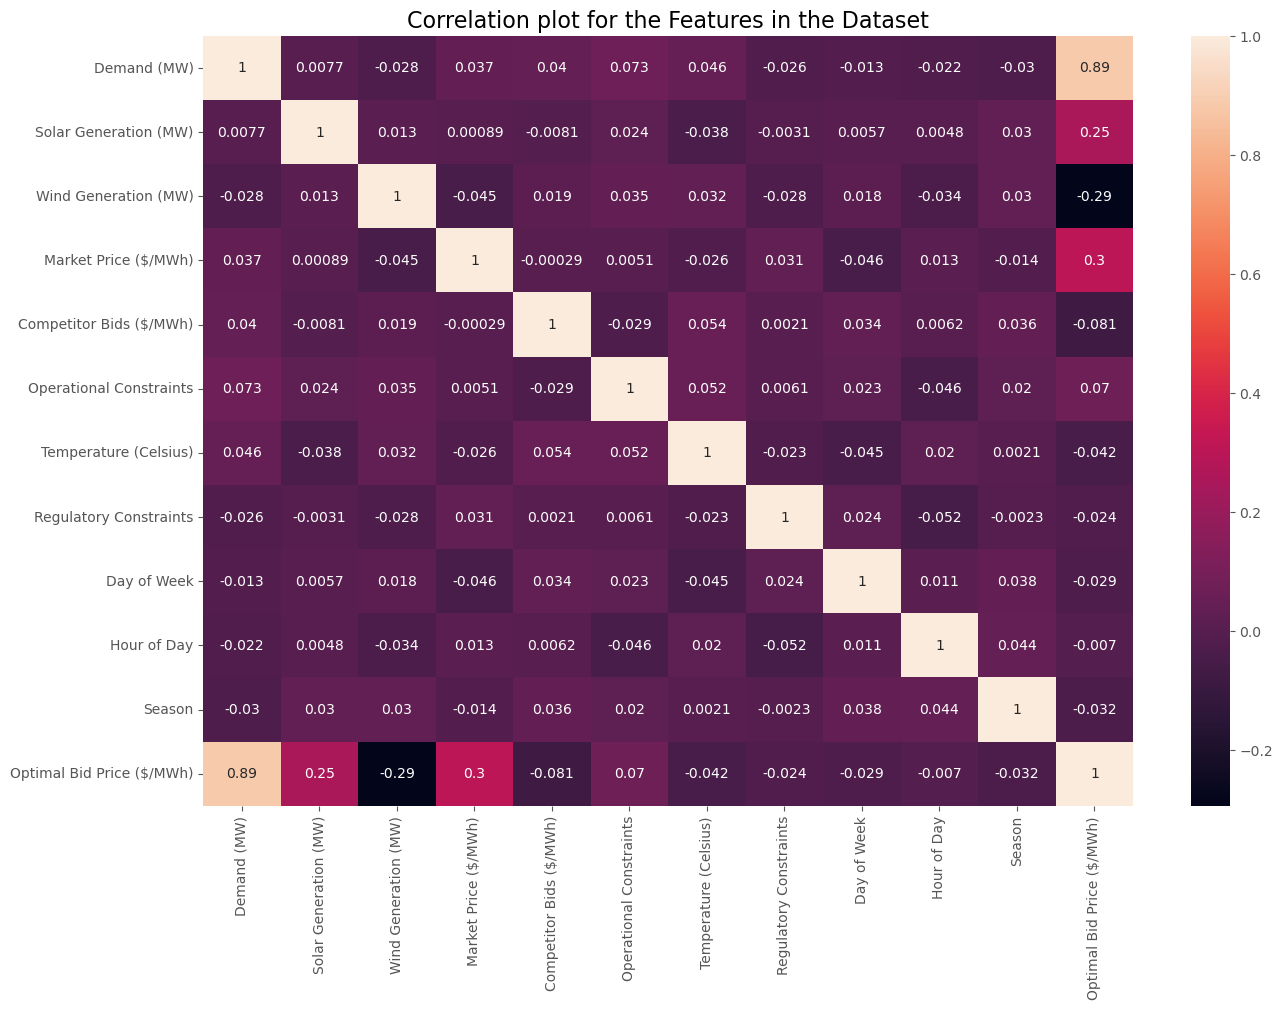

In [25]:
plt.figure(figsize=(15, 10))
sns.heatmap(vpp_df.corr(), annot = True)
plt.title('Correlation plot for the Features in the Dataset', fontsize=16)
plt.show()

Only the demand shows a strong positive correlation with the target variable (Optimal bid price). This indicates that increase in demand increases the optimal bid price for the renewal energy resource

Since the correlation in the features are very poor, the dataset should be scaled

* Scaling of the dataset (StandardScaler)

In [27]:
# Importing the algorithm (StandardScaler)
from sklearn.preprocessing import StandardScaler

# Initiating the scaler
standard_scaler = StandardScaler()

vpp_df_scaled = standard_scaler.fit_transform(vpp_df)

vpp_df_scaled = pd.DataFrame(vpp_df_scaled)

vpp_df_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.529535,1.386980,1.356176,1.681980,-0.213623,1.91648,-0.636053,-0.659333,-0.986133,-0.044059,-0.468223,1.828606
1,0.680218,0.003689,-1.402850,1.518741,0.289292,-0.52179,0.479983,-0.659333,0.523254,-1.592448,0.411895,1.310166
2,-0.508826,0.234237,1.471135,-1.568533,0.067092,-0.52179,-0.489574,-0.659333,0.020125,-1.310923,1.292013,-1.142320
3,-1.103348,-0.457408,-0.598134,-1.148567,0.915638,-0.52179,-1.208718,1.516684,0.020125,-1.310923,-0.468223,-1.274502
4,0.000764,0.695334,0.436501,-1.262797,-0.753847,-0.52179,0.344169,-0.659333,-1.489262,-1.029397,-1.348341,-0.209046


Now that the variables are scaled, let's split

## 4. Data Split

In [45]:
# Extracting the target variable from the input variable
X = vpp_df_scaled.drop(columns=[11]) # for input variables 

y = vpp_df_scaled[11]

In [46]:
X.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1.529535,1.386980,1.356176,1.681980,-0.213623,1.91648,-0.636053,-0.659333,-0.986133,-0.044059,-0.468223
1,0.680218,0.003689,-1.402850,1.518741,0.289292,-0.52179,0.479983,-0.659333,0.523254,-1.592448,0.411895
2,-0.508826,0.234237,1.471135,-1.568533,0.067092,-0.52179,-0.489574,-0.659333,0.020125,-1.310923,1.292013
3,-1.103348,-0.457408,-0.598134,-1.148567,0.915638,-0.52179,-1.208718,1.516684,0.020125,-1.310923,-0.468223
4,0.000764,0.695334,0.436501,-1.262797,-0.753847,-0.52179,0.344169,-0.659333,-1.489262,-1.029397,-1.348341


In [47]:
y.head()

0    1.828606
1    1.310166
2   -1.142320
3   -1.274502
4   -0.209046
Name: 11, dtype: float64

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=30, random_state=42)

In [49]:
X_train.shape

(970, 11)

In [50]:
y_train.shape

(970,)

In [51]:
X_test.shape

(30, 11)

In [52]:
y_test.shape

(30,)

## 5. Model Selection

* Random Forest Regressor

* Gradient Boosting Algorithms

## 6. Model Training 

#### Model 1: Random Forest Regressor

In [55]:
# Import of the necessary libraries needed for the training of the models
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initializing the random forest regressor model with n_estimators=100
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Fitting the train dataset to the model
rf_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Print or use the metrics as needed
print(f"MAE before optimization: {mae}")
print(f"MSE before optimization: {mse}")
print(f"RMSE before optimization: {rmse}")
print(f"R2 Score before optimization: {r2}")

MAE before optimization: 0.14661351951160145
MSE before optimization: 0.03639138216095064
RMSE before optimization: 0.19076525407146513
R2 Score before optimization: 0.9606050011688827


#### Hyperparameter Tunning with GridSearchCv on Model 1 (Random Forest Regressor)

In [56]:
# Import of the GridSearchCv optimizer
from sklearn.model_selection import GridSearchCV, train_test_split

# Defining the best parameters
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# initializing the random forest regressor algorithm
rf_model = RandomForestRegressor()

# Initializing the GridSearchCV 
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

# Fitting the grid_search cv
grid_search.fit(X_train, y_train)

# Getting the best parameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_model = grid_search.best_estimator_
y_pred_a = best_model.predict(X_test)

# Evaluate the performance using metrics
mae_a = mean_absolute_error(y_test, y_pred_a)
mse_a = mean_squared_error(y_test, y_pred_a)
rmse_a = mean_squared_error(y_test, y_pred_a, squared=False)
r2_a = r2_score(y_test, y_pred_a)

print(f"MAE after Optimization: {mae_a}")
print(f"MSE after Optimization: {mse_a}")
print(f"RMSE after Optimization: {rmse_a}")
print(f"R2 Score after Optimization: {r2_a}")

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
MAE after Optimization: 0.1327346897396195
MSE after Optimization: 0.031231813873290284
RMSE after Optimization: 0.17672524967669528
R2 Score after Optimization: 0.9661904220732735


* Visulalizing the result from the random forest prediction

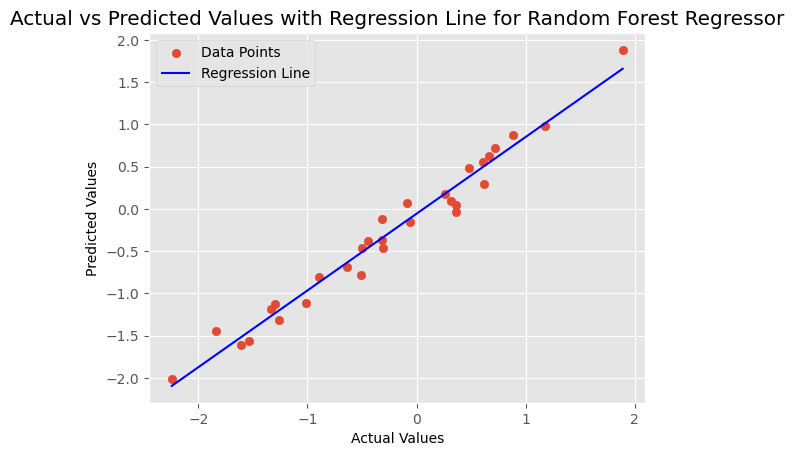

In [74]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming y_test and y_pred_best are your actual and predicted values
# Fit a linear regression line using numpy.polyfit
coefficients = np.polyfit(y_test, y_pred_a, 1)
polynomial = np.poly1d(coefficients)

# Plotting the scatter plot
plt.scatter(y_test, y_pred_a, label='Data Points')

# Plotting the regression line
plt.plot(np.unique(y_test), polynomial(np.unique(y_test)), color='blue', label='Regression Line')

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values with Regression Line for Random Forest Regressor")
plt.legend()
plt.show()

* Feature Importance 

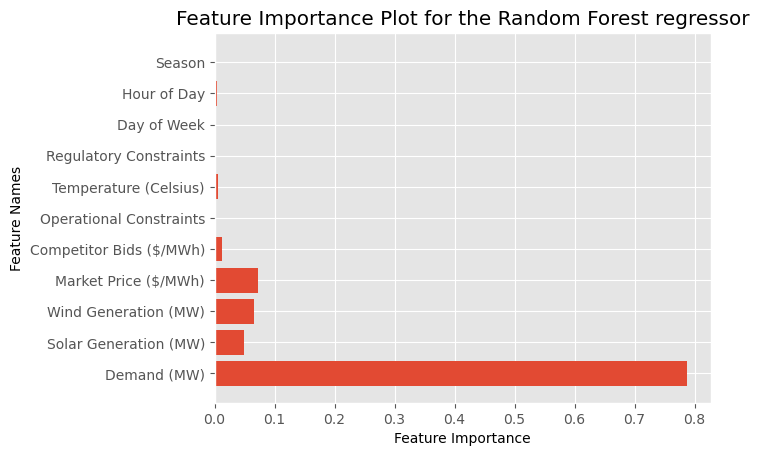

In [77]:
feature_importances = best_model.feature_importances_
feature_names = ['Demand (MW)', 'Solar Generation (MW)', 'Wind Generation (MW)',
       'Market Price (\$/MWh)', 'Competitor Bids (\$/MWh)',
       'Operational Constraints', 'Temperature (Celsius)',
       'Regulatory Constraints', 'Day of Week', 'Hour of Day', 'Season']

plt.barh(feature_names, feature_importances)
plt.xlabel("Feature Importance")
plt.ylabel("Feature Names")
plt.title("Feature Importance Plot for the Random Forest regressor")
plt.show()

The following features have impact on the prediction of optimal bid price

1. The Demand of Energy (over 75% impact)
2. While Competitor bids, market price, wind generation and solar generation have less than 1% impact on the optimal bid price

This indicates that with demad, the introduction of VPP including the solar generation and wind generation are sufficient to run this system. And the bid-a day ahead is a good strategy as competitors' influence is very neglible

#### Model 2: Gradient Boosting Algorithms

In [57]:
# Import of the gradient boosting algorithm
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = mean_squared_error(y_test, y_pred_gb, squared=False)
r2_gb = r2_score(y_test, y_pred_gb)

# Print or use the metrics as needed
print(f"MAE before optimization: {mae_gb}")
print(f"MSE before optimization: {mse_gb}")
print(f"RMSE before optimization: {rmse_gb}")
print(f"R2 Score before optimization: {r2_gb}")

MAE before optimization: 0.07167321376028575
MSE before optimization: 0.009943941988895198
RMSE before optimization: 0.09971931602701253
R2 Score before optimization: 0.9892353200189913


#### Hyperparameter Tunning with GridSearchCv on Gradient Boosting Regressor 

In [58]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search through
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0]
}

# Initialize the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)

# Initialize the Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Perform the Grid Search on the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model from the search
best_gb_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred_best = best_gb_model.predict(X_test)

# Evaluate the performance using metrics
mae_a_gb = mean_absolute_error(y_test, y_pred_best)
mse_a_gb = mean_squared_error(y_test, y_pred_best)
rmse_a_gb = mean_squared_error(y_test, y_pred_best, squared=False)
r2_a_gb = r2_score(y_test, y_pred_best)

print(f"MAE after Optimization: {mae_a_gb}")
print(f"MSE after Optimization: {mse_a_gb}")
print(f"RMSE after Optimization: {rmse_a_gb}")
print(f"R2 Score after Optimization: {r2_a_gb}")

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 150, 'subsample': 0.8}
MAE after Optimization: 0.07532923318062353
MSE after Optimization: 0.009752301296832237
RMSE after Optimization: 0.0987537406726056
R2 Score after Optimization: 0.9894427780596456


* visualizing the results from the optimized predictions

* Scatterplot

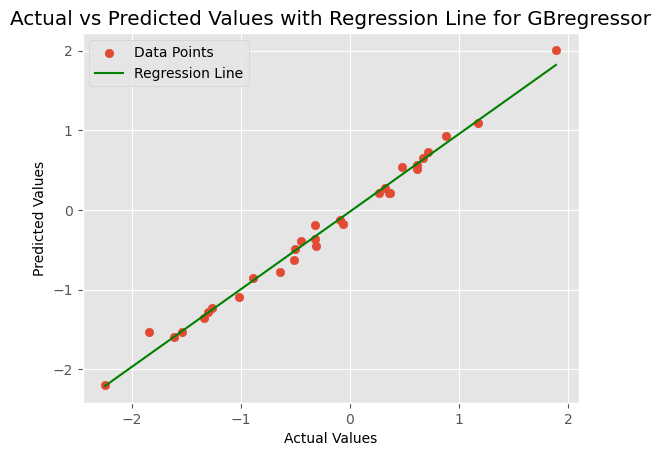

In [62]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming y_test and y_pred_best are your actual and predicted values
# Fit a linear regression line using numpy.polyfit
coefficients = np.polyfit(y_test, y_pred_best, 1)
polynomial = np.poly1d(coefficients)

# Plotting the scatter plot
plt.scatter(y_test, y_pred_best, label='Data Points')

# Plotting the regression line
plt.plot(np.unique(y_test), polynomial(np.unique(y_test)), color='green', label='Regression Line')

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values with Regression Line for GBregressor")
plt.legend()
plt.show()

* The scatter plot shows how the predicted values deviate from the regression line

* Feature Importance 

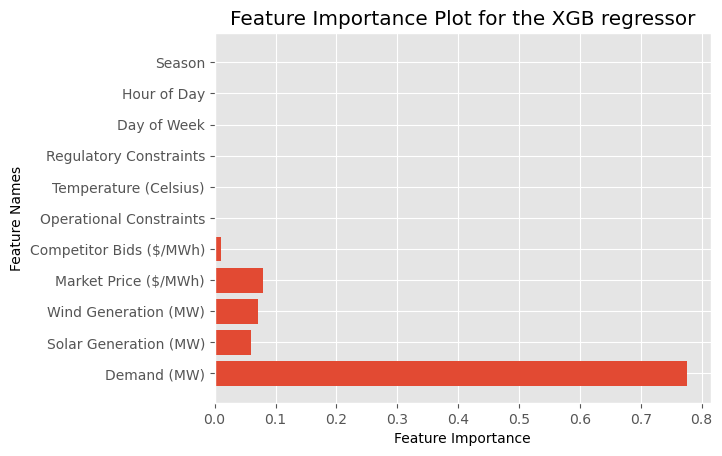

In [73]:
feature_importances = best_gb_model.feature_importances_
feature_names = ['Demand (MW)', 'Solar Generation (MW)', 'Wind Generation (MW)',
       'Market Price (\$/MWh)', 'Competitor Bids (\$/MWh)',
       'Operational Constraints', 'Temperature (Celsius)',
       'Regulatory Constraints', 'Day of Week', 'Hour of Day', 'Season']

plt.barh(feature_names, feature_importances)
plt.xlabel("Feature Importance")
plt.ylabel("Feature Names")
plt.title("Feature Importance Plot for the XGB regressor")
plt.show()

The following features have impact on the prediction of optimal bid price

1. The Demand of Energy (over 75% impact)
2. While Competitor bids, market price, wind generation and solar generation have less than 1% impact on the optimal bid price

This indicates that with demad, the introduction of VPP including the solar generation and wind generation are sufficient to run this system. And the bid-a day ahead is a good strategy as competitors' influence is very neglible